# NOAA GOES 16 Satellite Data

last run: Nov 16, 2019

In [1]:
import tempfile

import boto3
import matplotlib.pyplot as plt
import netCDF4
import xarray as xr

S3_BUCKET = "noaa-goes16"  # open-source from NOAA
TEST_KEY = "ABI-L1b-RadM/2019/001/00/OR_ABI-L1b-RadM1-M3C01_G16_s20190010000265_e20190010000323_c20190010000363.nc" # ABI-L1b-RadM sensor, first hour-day of 2019

s3 = boto3.client("s3")

## Downloading

One can access NOAA's publicly-accessible data set at their [s3 bucket](https://s3.console.aws.amazon.com/s3/buckets/noaa-goes16/?region=us-west-2&tab=overview). Specifically, we are interested in data from the `ABI-L1b-RadM` sensor, which is organized into `<year>/<day of year>/<hour of day>/<file>.nc`. As the file extension suggests, these files are in NetCDF format. 

A typical path is: `noaa-goes16/ABI-L1b-RadM/2019/001/00/OR_ABI-L1b-RadM1-M3C01_G16_s20190010000265_e20190010000323_c20190010000363.nc`:

- noaa-goes16 (bucket name)
- ABI-L1b-RadM (sensor on the satellite)
- 2019 (year)
- 001 (day of year)
- 00 (hour of day)
- OR (real-time data)
- ABI (sensor type)
- L1b (processing level -- L1b or L2)
- Rad (radians)
- M1 (mesoscale region 1)
- M3 (mode 3)
- C05 (channel 5 -- 01 through 16)
- G16 (GOES-16 satellite)
- s20190010000265 (scan start time)
- e20190010000323 (scan end time)
- c20190010000363 (file creation time)
- .nc (nedCDF file extension)


For more information, refer to https://docs.opendata.aws/noaa-goes16/cics-readme.html. 

In [2]:
with tempfile.NamedTemporaryFile() as file_path:
    s3.download_file(Bucket=S3_BUCKET, Key=TEST_KEY, Filename=file_path.name)
    array = xr.open_dataset(file_path.name)

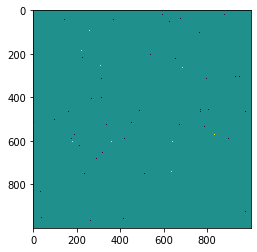

In [3]:
plt.imshow(array.Rad);